In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
food_health

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_state,facility_zip,employee_id,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,Year,Month
0,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030,2018,03
1,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027,2018,03
2,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035,2018,03
3,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033,2018,03
4,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029,2018,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272796,DAZZXBLXG,2015-10-01T00:00:00,LA CIENEGA KABOB HOUSE,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,2,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,FA0033028,CA,90048,EE0000951,OW0018476,"KARAPETYAN, RAFIK",RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF023,2015,10
272797,DAZZXBLXG,2015-10-01T00:00:00,LA CIENEGA KABOB HOUSE,F006,# 06. Adequate handwashing facilities supplied...,OUT OF COMPLIANCE,2,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,FA0033028,CA,90048,EE0000951,OW0018476,"KARAPETYAN, RAFIK",RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF006,2015,10
272798,DAZZXBLXG,2015-10-01T00:00:00,LA CIENEGA KABOB HOUSE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,FA0033028,CA,90048,EE0000951,OW0018476,"KARAPETYAN, RAFIK",RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF040,2015,10
272799,DAZZXBLXG,2015-10-01T00:00:00,LA CIENEGA KABOB HOUSE,F036,"# 36. Equipment, utensils and linens: storage ...",OUT OF COMPLIANCE,1,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,FA0033028,CA,90048,EE0000951,OW0018476,"KARAPETYAN, RAFIK",RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF036,2015,10


In [ ]:
food_health.facility_name.value_counts().head(10)


DODGER STADIUM                981
STAPLES CENTER (LEVY)         969
LA COLISEUM                   673
THE COFFEE BEAN & TEA LEAF    449
WHOLE FOODS MARKET            446
7-ELEVEN                      425
HONG KONG EXPRESS             377
SUBWAY                        373
EL SUPER                      350
TRIMANA                       295
Name: facility_name, dtype: int64

In [ ]:
food_health=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MSDS 596 (python)/Data/restaurant-and-market-health-violations.csv")

In [ ]:

food_health.columns

Index(['serial_number', 'activity_date', 'facility_name', 'violation_code',
       'violation_description', 'violation_status', 'points', 'grade',
       'facility_address', 'facility_city', 'facility_id', 'facility_state',
       'facility_zip', 'employee_id', 'owner_id', 'owner_name',
       'pe_description', 'program_element_pe', 'program_name',
       'program_status', 'record_id', 'score', 'service_code',
       'service_description', 'row_id'],
      dtype='object')

In [ ]:
def year_to_decade(year):
    year_str = str(year)
    return year_str[0:4]

def year_to_month(year):
  return year[5:7]

food_health['Year']=food_health.activity_date.apply(year_to_decade)
food_health['Month']=food_health.activity_date.apply(year_to_month)
dates=food_health.loc[:,['Year','Month', 'facility_name']]


In [ ]:
#different years: 2018,2017,2016,2015
#can do this when graphing dont do it now!!!
def year_to_decade(Year):
    year_str = str(Year)
    return year_str

def year_to_decade(Year):
    year_int = int(Year)


In [ ]:
food_health.columns

Index(['serial_number', 'activity_date', 'facility_name', 'violation_code',
       'violation_description', 'violation_status', 'points', 'grade',
       'facility_address', 'facility_city', 'facility_id', 'facility_state',
       'facility_zip', 'employee_id', 'owner_id', 'owner_name',
       'pe_description', 'program_element_pe', 'program_name',
       'program_status', 'record_id', 'score', 'service_code',
       'service_description', 'row_id', 'Year', 'Month'],
      dtype='object')

In [ ]:
#Mcdonalds
McD=food_health.facility_name.str.contains('MCDON')
food_health[McD]
Mcdon= food_health.facility_name.str.contains('MCDONALD\'S #4589')
food_health[Mcdon]
#In-N-Out Burger
In_out=food_health.facility_name.str.contains('IN-N-OUT')
food_health[In_out]
#fatBurger
fat=food_health.facility_name.str.contains('FATBURGER')
food_health[fat]
#Carls Jr
carl=food_health.facility_name.str.contains('CARL\'S JR')
food_health[carl]
#Burger King
king=food_health.facility_name.str.contains('BURGER KING')
food_health[king]
#Chick-fil-a
chick=food_health.facility_name.str.contains('CHICK-FIL-A')
food_health[chick]
#Checkers
check=food_health.facility_name.str.contains('CHECKER\'S')
food_health[check]
#Five guys
five_guys=food_health.facility_name.str.contains('FIVE GUYS')
food_health[five_guys]
#jack in the box
jack=food_health.facility_name.str.contains('JACK IN')
food_health[jack]
#Wendy's
wendy=food_health.facility_name.str.contains('WENDY')
food_health[wendy]

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_state,facility_zip,employee_id,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,Year,Month
8771,DANAQHLMR,2018-02-28T00:00:00,WENDY'S #34860,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,1305 N VERMONT BLVD,LOS ANGELES,FA0256131,CA,90027,EE0000846,OW0248895,WKS FROSTY CORPORATION,RESTAURANT (61-150) SEATS MODERATE RISK,1637,WENDY'S #34860,ACTIVE,PR0205881,96,1,ROUTINE INSPECTION,DANAQHLMRF033,2018,02
8772,DANAQHLMR,2018-02-28T00:00:00,WENDY'S #34860,F006,# 06. Adequate handwashing facilities supplied...,OUT OF COMPLIANCE,2,A,1305 N VERMONT BLVD,LOS ANGELES,FA0256131,CA,90027,EE0000846,OW0248895,WKS FROSTY CORPORATION,RESTAURANT (61-150) SEATS MODERATE RISK,1637,WENDY'S #34860,ACTIVE,PR0205881,96,1,ROUTINE INSPECTION,DANAQHLMRF006,2018,02
8773,DANAQHLMR,2018-02-28T00:00:00,WENDY'S #34860,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,1305 N VERMONT BLVD,LOS ANGELES,FA0256131,CA,90027,EE0000846,OW0248895,WKS FROSTY CORPORATION,RESTAURANT (61-150) SEATS MODERATE RISK,1637,WENDY'S #34860,ACTIVE,PR0205881,96,1,ROUTINE INSPECTION,DANAQHLMRF044,2018,02
13558,DAQSP8E6I,2018-02-12T00:00:00,WENDY'S MARKET,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,2,B,3354 EAGLE ROCK BLVD,LOS ANGELES,FA0073844,CA,90065,EE0000923,OW0012822,"GARCIA, JOSE H","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S MARKET,ACTIVE,PR0040341,83,1,ROUTINE INSPECTION,DAQSP8E6IF023,2018,02
13559,DAQSP8E6I,2018-02-12T00:00:00,WENDY'S MARKET,F053,# 21a. Hot Water Available,OUT OF COMPLIANCE,2,B,3354 EAGLE ROCK BLVD,LOS ANGELES,FA0073844,CA,90065,EE0000923,OW0012822,"GARCIA, JOSE H","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S MARKET,ACTIVE,PR0040341,83,1,ROUTINE INSPECTION,DAQSP8E6IF053,2018,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261400,DA8O0V5KZ,2015-11-05T00:00:00,WENDY'S 99~ STORE,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,4752 E CESAR E CHAVEZ AVE,LOS ANGELES,FA0054379,CA,90022,EE0001049,OW0029582,"RAMIREZ, NEFTALI","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S 99~ STORE,INACTIVE,PR0021474,92,1,ROUTINE INSPECTION,DA8O0V5KZF044,2015,11
261401,DA8O0V5KZ,2015-11-05T00:00:00,WENDY'S 99~ STORE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,4752 E CESAR E CHAVEZ AVE,LOS ANGELES,FA0054379,CA,90022,EE0001049,OW0029582,"RAMIREZ, NEFTALI","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S 99~ STORE,INACTIVE,PR0021474,92,1,ROUTINE INSPECTION,DA8O0V5KZF033,2015,11
261402,DA8O0V5KZ,2015-11-05T00:00:00,WENDY'S 99~ STORE,F042,"# 42. Toilet facilities: properly constructed,...",OUT OF COMPLIANCE,1,A,4752 E CESAR E CHAVEZ AVE,LOS ANGELES,FA0054379,CA,90022,EE0001049,OW0029582,"RAMIREZ, NEFTALI","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S 99~ STORE,INACTIVE,PR0021474,92,1,ROUTINE INSPECTION,DA8O0V5KZF042,2015,11
261403,DA8O0V5KZ,2015-11-05T00:00:00,WENDY'S 99~ STORE,F021,# 21b. Water available,OUT OF COMPLIANCE,2,A,4752 E CESAR E CHAVEZ AVE,LOS ANGELES,FA0054379,CA,90022,EE0001049,OW0029582,"RAMIREZ, NEFTALI","FOOD MKT RETAIL (25-1,999 SF) LOW RISK",1610,WENDY'S 99~ STORE,INACTIVE,PR0021474,92,1,ROUTINE INSPECTION,DA8O0V5KZF021,2015,11


In [ ]:
top_burgers=food_health[McD | In_out | fat | carl | king | chick | check | five_guys | jack | wendy].sort_values('score', ascending=True)

In [ ]:

top_burgers['In-N-Out Burger'] = np.where(top_burgers['facility_name'].str.contains('IN-N-OUT'), 'In-N-Out Burger', np.nan)
top_burgers['Mcdonalds'] = np.where(top_burgers['facility_name'].str.contains('MCDON'), 'Mcdonalds', np.nan)
top_burgers['Carl\'s Jr']=np.where(top_burgers.facility_name.str.contains('CARL\'S JR'), 'Carl\'s Jr',np.nan)
top_burgers['Burger King']=np.where(top_burgers.facility_name.str.contains('BURGER KING'), 'Burger King', np.nan)
top_burgers['Chick-Fil-A']=np.where(top_burgers.facility_name.str.contains('CHICK-FIL-A'), 'Chick-Fil-A', np.nan)
top_burgers['Checker\'s']=np.where(top_burgers.facility_name.str.contains('CHECKER\'S'), 'Checker\'s', np.nan)
top_burgers['Five Guys']=np.where(top_burgers.facility_name.str.contains('FIVE GUYS'), 'Five Guys', np.nan)
top_burgers['Jack In The Box']=np.where(top_burgers.facility_name.str.contains('JACK IN'), 'Jack In The Box', np.nan)
top_burgers['FatBurger']=np.where(top_burgers.facility_name.str.contains('FATBURGER'), 'FatBurger', np.nan)
top_burgers['Wendy\'s']=np.where(top_burgers.facility_name.str.contains('WENDY'), 'Wendy\'s', np.nan)


In [ ]:
cols = ['In-N-Out Burger','Mcdonalds','Carl\'s Jr','Burger King','Chick-Fil-A','Checker\'s', 'Five Guys', 'Jack In The Box','FatBurger','Wendy\'s'   ]
top_burgers['Burger Joints']=top_burgers[cols].apply(lambda row:''.join(row.values.astype(str)), axis=1)
top_burgers['Burger Joints'] = top_burgers['Burger Joints'].str.replace('nan', '')
top_burgers

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_state,facility_zip,employee_id,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,Year,Month,In-N-Out Burger,Mcdonalds,Carl's Jr,Burger King,Chick-Fil-A,Checker's,Five Guys,Jack In The Box,FatBurger,Wendy's,Burger Joints
32148,DAZW3YBKG,2017-11-28T00:00:00,MCDONALD'S #1135,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,C,1800 S WESTERN AVE,LOS ANGELES,FA0066636,CA,90006,EE0000884,OW0010276,D BAILEY MANAGEMENT COMPANY,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MC DONALD'S,INACTIVE,PR0030329,77,1,ROUTINE INSPECTION,DAZW3YBKGF035,2017,11,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
32147,DAZW3YBKG,2017-11-28T00:00:00,MCDONALD'S #1135,F013,"# 13. Food in good condition, safe and unadult...",OUT OF COMPLIANCE,2,C,1800 S WESTERN AVE,LOS ANGELES,FA0066636,CA,90006,EE0000884,OW0010276,D BAILEY MANAGEMENT COMPANY,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MC DONALD'S,INACTIVE,PR0030329,77,1,ROUTINE INSPECTION,DAZW3YBKGF013,2017,11,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
32149,DAZW3YBKG,2017-11-28T00:00:00,MCDONALD'S #1135,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,C,1800 S WESTERN AVE,LOS ANGELES,FA0066636,CA,90006,EE0000884,OW0010276,D BAILEY MANAGEMENT COMPANY,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MC DONALD'S,INACTIVE,PR0030329,77,1,ROUTINE INSPECTION,DAZW3YBKGF037,2017,11,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
32150,DAZW3YBKG,2017-11-28T00:00:00,MCDONALD'S #1135,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,C,1800 S WESTERN AVE,LOS ANGELES,FA0066636,CA,90006,EE0000884,OW0010276,D BAILEY MANAGEMENT COMPANY,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MC DONALD'S,INACTIVE,PR0030329,77,1,ROUTINE INSPECTION,DAZW3YBKGF040,2017,11,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
32151,DAZW3YBKG,2017-11-28T00:00:00,MCDONALD'S #1135,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,C,1800 S WESTERN AVE,LOS ANGELES,FA0066636,CA,90006,EE0000884,OW0010276,D BAILEY MANAGEMENT COMPANY,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MC DONALD'S,INACTIVE,PR0030329,77,1,ROUTINE INSPECTION,DAZW3YBKGF030,2017,11,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178416,DAAMXHLG5,2016-07-12T00:00:00,MCDONALD'S #2287,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,11300 NATIONAL BLVD,LOS ANGELES,FA0024293,CA,90064,EE0000144,OW0023946,MCDONALD'S CORPORATION,RESTAURANT (61-150) SEATS MODERATE RISK,1637,MCDONALD'S #2287,ACTIVE,PR0023923,99,1,ROUTINE INSPECTION,DAAMXHLG5F035,2016,07,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
153931,DA4VZ0T00,2016-09-28T00:00:00,MCDONALD'S # 24341,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,1111 FIGUEROA ST,LOS ANGELES,FA0165809,CA,90015,EE0000633,OW0129044,SANCHEA FAMILY CORP III,RESTAURANT (0-30) SEATS MODERATE RISK,1631,MC DONALD'S - UPPER CONCOURSE,ACTIVE,PR0155987,99,1,ROUTINE INSPECTION,DA4VZ0T00F044,2016,09,nan,Mcdonalds,nan,nan,nan,nan,nan,nan,nan,nan,Mcdonalds
27044,DA5IOIGDB,2017-12-18T00:00:00,BURGER KING # 1417,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,12736 S AVALON BLVD,LOS ANGELES,FA0137635,CA,90061,EE0000195,OW0100770,WALDORF RESTAURANT GROUP AVALON,RESTAURANT (31-60) SEATS MODERATE RISK,1634,BURGER KING,ACTIVE,PR0121751,99,1,ROUTINE INSPECTION,DA5IOIGDBF037,2017,12,nan,nan,nan,Burger King,nan,nan,nan,nan,nan,nan,Burger King
188143,DAS0MULD0,2016-06-15T00:00:00,CARL'S JR,F037,# 37. Adequate ventilation and lighting; desig...

In [ ]:
food_health.loc[:,['Year','Month', 'facility_name']]

fast_food=top_burgers.loc[:,['facility_name', 'violation_code', 'facility_address', 'facility_zip', 'score','grade', 'Burger Joints','Year', 'Month', 'serial_number']]
fast_food

,facility_name,violation_code,facility_address,facility_zip,score,grade,Burger Joints,Year,Month,serial_number
32148,MCDONALD'S #1135,F035,1800 S WESTERN AVE,90006,77,C,Mcdonalds,2017,11,DAZW3YBKG
32147,MCDONALD'S #1135,F013,1800 S WESTERN AVE,90006,77,C,Mcdonalds,2017,11,DAZW3YBKG
32149,MCDONALD'S #1135,F037,1800 S WESTERN AVE,90006,77,C,Mcdonalds,2017,11,DAZW3YBKG
32150,MCDONALD'S #1135,F040,1800 S WESTERN AVE,90006,77,C,Mcdonalds,2017,11,DAZW3YBKG
32151,MCDONALD'S #1135,F030,1800 S WESTERN AVE,90006,77,C,Mcdonalds,2017,11,DAZW3YBKG
...,...,...,...,...,...,...,...,...,...,...
178416,MCDONALD'S #2287,F035,11300 NATIONAL BLVD,90064,99,A,Mcdonalds,2016,07,DAAMXHLG5
153931,MCDONALD'S # 24341,F044,1111 FIGUEROA ST,90015,99,A,Mcdonalds,2016,09,DA4VZ0T00
27044,BURGER KING # 1417,F037,12736 S AVALON BLVD,90061,99,A,Burger King,2017,12,DA5IOIGDB
188143,CARL'S JR,F037,308 WESTWOOD PLZ 505,90024,99,A,Carl's Jr,2016,06,DAS0MULD0


Text(-56.574999999999996, 0.5, 'Fast Food Restaurants')

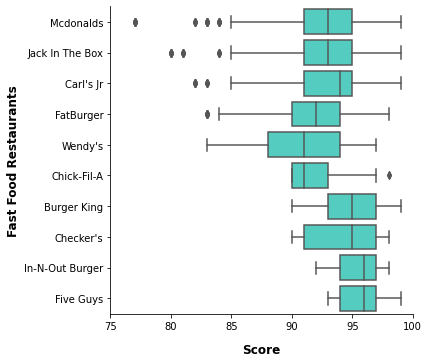

In [ ]:
chart=sns.catplot(kind='box', data=fast_food, x="score", y="Burger Joints", color= 'turquoise', aspect=1.2) 
chart.set(xlim=(75, 100), ylabel='Fast Food Restaurants', xlabel='Score' )
ax=chart.axes[0,0]
ax.set_xlabel('Score', fontsize=12, labelpad=12, weight='semibold')
ax.set_ylabel('Fast Food Restaurants', fontsize=12,weight='semibold')

In [ ]:
fast_food.rename(columns={'violation_code':'Violation Code'}, inplace=True)
fast_food["Violation Code"] = food_health["violation_code"].transform(lambda x: x[2:4])

In [ ]:
the_violations=fast_food.groupby(by=['Burger Joints','Violation Code'], as_index=False)['grade'].count()
the_violations.sort_values('grade', ascending=False, inplace=True)
the_violations_pivoted= the_violations.pivot('Burger Joints','Violation Code','grade')
the_violations_pivoted.fillna(0, inplace=True)
the_violations_pivoted
the_violations_pivoted['Total'] = the_violations_pivoted.sum(axis=1)
the_violations_pivoted.head()
the_violations_pivoted = the_violations_pivoted*100 / the_violations_pivoted.sum(axis=0)
the_violations_pivoted
the_violations_final = the_violations_pivoted.drop(columns=["Total"])
the_violations_final.info

<bound method DataFrame.info of Violation Code          01         04     05  ...         53     54         55
Burger Joints                                 ...                             
Burger King       9.677419   0.000000  12.50  ...  10.000000    0.0  11.111111
Carl's Jr        22.580645   9.090909  25.00  ...   6.666667  100.0  33.333333
Checker's         0.000000   0.000000   0.00  ...   0.000000    0.0   0.000000
Chick-Fil-A       0.000000  18.181818   0.00  ...  10.000000    0.0   0.000000
FatBurger        12.903226   0.000000   6.25  ...   3.333333    0.0  22.222222
Five Guys         0.000000   0.000000   0.00  ...   0.000000    0.0   0.000000
In-N-Out Burger   0.000000   9.090909   6.25  ...   6.666667    0.0   0.000000
Jack In The Box   9.677419  36.363636  12.50  ...  13.333333    0.0  33.333333
Mcdonalds        45.161290  27.272727  31.25  ...  43.333333    0.0   0.000000
Wendy's           0.000000   0.000000   6.25  ...   6.666667    0.0   0.000000

[10 rows x 42 colum

Text(159.0, 0.5, 'Fast Food Restaurants')

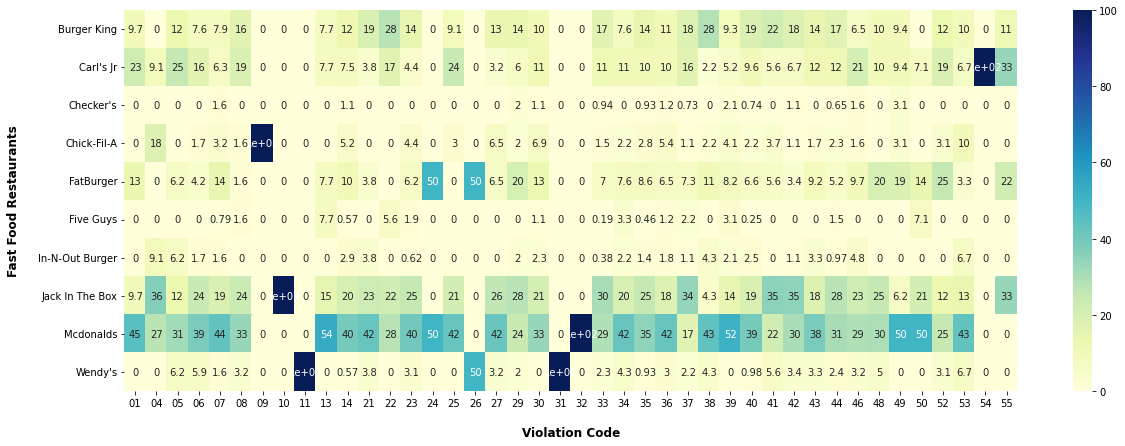

In [ ]:
f, ax = plt.subplots(figsize=(20,7)) # increasing the figure size for visibility
chart2=sns.heatmap(data=the_violations_final, cmap="YlGnBu", annot=True, ax=ax)
chart2.set( ylabel='Fast Food Restaurants', xlabel='Violation Code' )
chart.set(xlim=(75, 100), ylabel='Fast Food Restaurants', xlabel='Violation Code' )
ax.set_xlabel('Violation Code', fontsize=12, labelpad=18, weight='semibold')
ax.set_ylabel('Fast Food Restaurants', fontsize=12, labelpad=18, weight='semibold')

In [ ]:
#09, 10, 11, 31, 32, 54
#F009 is violation for proper cooling methods
#F010 is Proper cooking time and temperature
#F011 is proper reheating procedures for hot holding
#F031 Consumer selfservice
#F032 Food properly labled & honestly presented
#F054 Multiple Major Critical Violations / Increased Risk to Public Health 